In [0]:
import tensorflow as tf

In [0]:
a=tf.constant(20)
a

<tf.Tensor 'Const:0' shape=() dtype=int32>

In [0]:
sess1=tf.Session()
sess1.run(a)

20

In [0]:
from tensorflow.examples.tutorials.mnist import input_data

In [0]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

W0705 08:15:53.125862 140479965063040 deprecation.py:323] From <ipython-input-5-a839aeb82f4b>:1: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0705 08:15:53.127756 140479965063040 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W0705 08:15:53.129781 140479965063040 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/base.py:252: _internal_retry.<locals>.wrap.<locals>.wrapped_fn (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz


W0705 08:15:53.520491 140479965063040 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.
W0705 08:15:53.526186 140479965063040 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:110: dense_to_one_hot (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.one_hot on tensors.
W0705 08:15:53.618318 140479965063040 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:290: DataSet.__init__ (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be remove

Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [0]:
mnist.train.labels.shape

(55000, 10)

In [0]:
mnist.train.images.shape

(55000, 784)

In [0]:
mnist.test.labels.shape

(10000, 10)

In [0]:
mnist.test.images.shape

(10000, 784)

In [0]:
import matplotlib.pyplot as plt

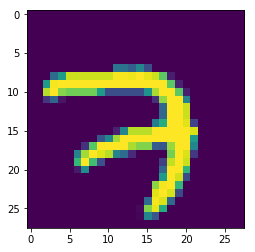

In [0]:
first_image=mnist.train.images[0]
first_image=first_image.reshape((28,28))
plt.imshow(first_image)
plt.show()

In [0]:
n_input= 784
n_h1=256
n_h2=256
n_output= 10


In [0]:
weights={
    'h1': tf.Variable(tf.random_normal([n_input, n_h1])),
    'h2': tf.Variable(tf.random_normal([n_h1, n_h2])),
    'out': tf.Variable(tf.random_normal([n_h2, n_output]))
}

biases={
    'h1': tf.Variable(tf.random_normal([n_h1])),
    'h2': tf.Variable(tf.random_normal([n_h2])),
    'out': tf.Variable(tf.random_normal([n_output]))
}

In [0]:
import numpy as np

In [0]:
def forward_propagation (x,weights,biases):
  
  input_h1= tf.add(tf.matmul(x,weights['h1']),biases['h1'])
  output_h1= tf.nn.relu(input_h1)
  
  input_h2= tf.add(tf.matmul(output_h1,weights['h2']),biases['h2'])
  output_h2= tf.nn.relu(input_h2)
  
  input_out= tf.add(tf.matmul(output_h2,weights['out']),biases['out'])
  output= input_out
  
  return output

In [0]:
x = tf.placeholder("float", shape=[None , n_input])
y = tf.placeholder(tf.int32, shape=[None, n_output])
x, y

(<tf.Tensor 'Placeholder:0' shape=(?, 784) dtype=float32>,
 <tf.Tensor 'Placeholder_1:0' shape=(?, 10) dtype=int32>)

In [0]:
pred= forward_propagation(x,weights,biases)

In [0]:
cost= tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred,labels=y))

W0705 08:15:54.368294 140479965063040 deprecation.py:323] From <ipython-input-18-cfc0f55d7946>:1: softmax_cross_entropy_with_logits (from tensorflow.python.ops.nn_ops) is deprecated and will be removed in a future version.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [0]:
optimizer = tf.train.AdamOptimizer(learning_rate=0.01)
optimize_step = optimizer.minimize(cost)

In [0]:
sess=tf.Session()
sess.run(tf.global_variables_initializer())
c=sess.run(cost,feed_dict={x:mnist.train.images,y:mnist.train.labels})
c

1352.6066

In [0]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [0]:
for i in range(400):
  c,_= sess.run([cost,optimize_step],feed_dict={x:mnist.train.images,y:mnist.train.labels})
  if (i%20==0):
    print(c)

2328.518
91.18853
47.025383
30.90409
22.790396
17.458696
13.6439295
10.798626
8.628461


In [0]:
predictions= tf.argmax(pred,axis=1)
true_values= tf.argmax(y,axis=1)
c_pred= tf.equal(predictions,true_values)

correct=sess.run(c_pred,feed_dict={x:mnist.train.images,y:mnist.train.labels})

In [0]:
correct.sum()

In [0]:
54950/55000